# **Introduction to Regression with Neural Networks in TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


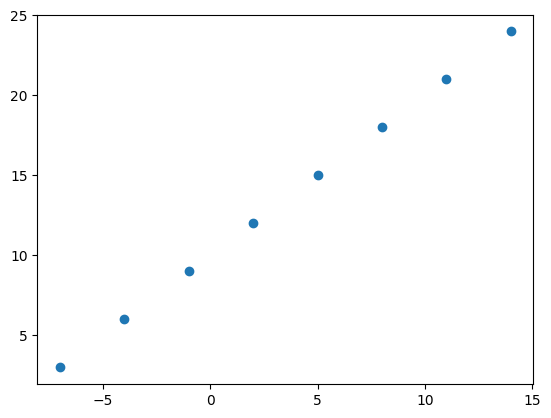

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0]

np.float64(-7.0)

In [ ]:
y[0]

np.float64(3.0)

In [ ]:
# turn np arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
X = tf.reshape(X, (-1, 1))
X.ndim

2

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([1]), TensorShape([]))

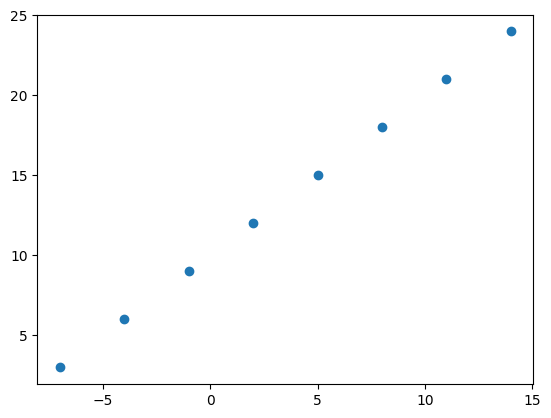

In [ ]:
plt.scatter(X,y)

# Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# set random seed
tf.random.set_seed(42)

In [ ]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.9990 - mae: 8.9990
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.8665 - mae: 8.8665
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.7340 - mae: 8.7340
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.6015 - mae: 8.6015
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.4690 - mae: 8.4690


In [ ]:
# check X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# make prediction using our model
y_pred = model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


array([[24.886917]], dtype=float32)

In [ ]:
y_pred + 11

array([[35.886917]], dtype=float32)

# Improving our model

We can improve our model, by altering the steps we took to create a model.

- Creating a model - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

- Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function.

- Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - loss: 16.9505 - mae: 16.9505
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 16.6693 - mae: 16.6693
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 16.3880 - mae: 16.3880
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 16.1068 - mae: 16.1068
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.8255 - mae: 15.8255
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.5443 - mae: 15.5443
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.2630 - mae: 15.2630
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.9818 - mae: 14.9818
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.7704 - mae: 14.7704
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 14.6379 - mae: 14.6379
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.5054 - mae: 14.5054
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.3729 - mae: 14.3729
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
# remind ourselves of our data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


array([[29.540747]], dtype=float32)

Let's see if another methods to improve our model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.7126 - mae: 12.7126
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.9906 - mae: 11.9906
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.2588 - mae: 11.2588
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 10.5145 - mae: 10.5145
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.7553 - mae: 9.7553
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.9793 - mae: 8.9793
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.1848 - mae: 8.1848
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.3699 - mae: 7.3699
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.8161 - mae: 6.8161
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.9934 - mae: 6.9934
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.2849 - mae: 7.2849
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.5211 - mae: 7.5211
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35

In [ ]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


array([[26.688301]], dtype=float32)

# Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

> Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

- The data - what data are we working with? What does it look like?
- The model itself - what does our model look like?
- The training of a model - how does a model perform while it learns?
- The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

**Reshaping X set**

In [ ]:
X = tf.reshape(X, shape=(-1,1))
X.ndim

2

In [ ]:
# make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-90],
       [-86],
       [-82],
       [-78],
       [-74],
       [-70],
       [-66],
       [-62],
       [-58],
       [-54],
       [-50],
       [-46],
       [-42],
       [-38],
       [-34],
       [-30],
       [-26],
       [-22],
       [-18],
       [-14],
       [-10],
       [ -6],
       [ -2],
       [  2],
       [  6],
       [ 10],
       [ 14],
       [ 18],
       [ 22],
       [ 26],
       [ 30],
       [ 34],
       [ 38],
       [ 42],
       [ 46],
       [ 50],
       [ 54],
       [ 58],
       [ 62],
       [ 66],
       [ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

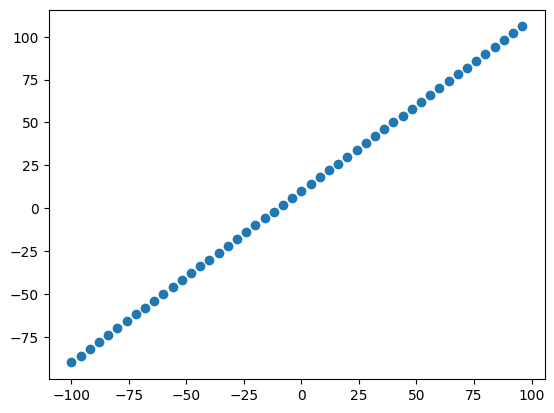

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

## The 3 sets...

- Training set - the model learns from this data, which is typically 70-80% of the total data you have available.

- Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.

- Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40]
y_train = y[:40]

X_test=X[40:]
y_test=y[40:]

In [ ]:
len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

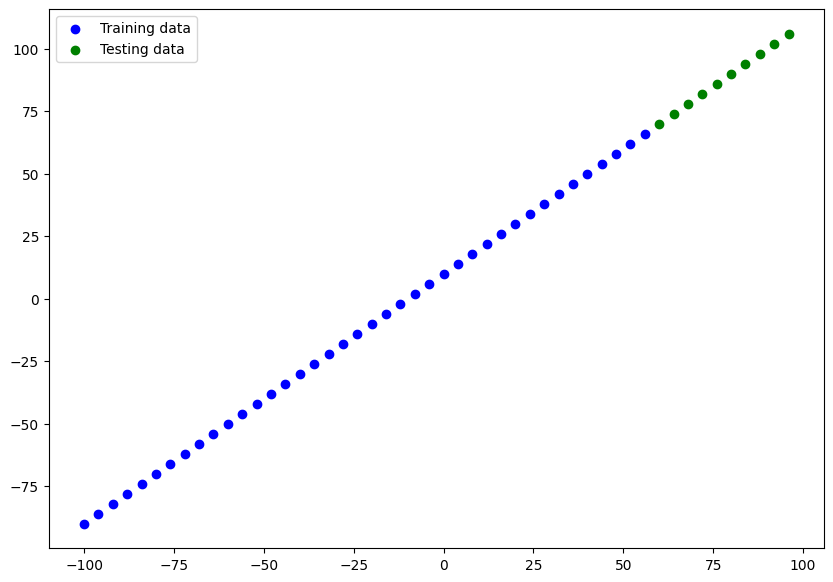

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [ ]:
# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 29.1901 - mae: 29.1901
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.7146 - mae: 9.7146
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.3263 - mae: 11.3263
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.1059 - mae: 8.1059
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.7584 - mae: 10.7584
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.2554 - mae: 10.2554
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.0318 - mae: 12.0318
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.6506 - mae: 12.6506
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.1627 - mae: 8.1627
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.8178 - mae: 8.8178
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.7656 - mae: 7.7656
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.7370 - mae: 10.7370
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

Visualizing the model

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

---

In [ ]:
# create a model that builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name = 'model_1')

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# get model summary
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - loss: 43.7099 - mae: 43.7099
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 33.9132 - mae: 33.9132
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17.9128 - mae: 17.9128
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 20.0041 - mae: 20.0041
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.1249 - mae: 18.1249
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.9780 - mae: 11.9780
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.2930 - mae: 18.2930
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 13.6586 - mae: 13.6586
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.0764 - mae: 15.0764
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.0219 - mae: 11.0219
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.8426 - mae: 14.8426
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.9303 - mae: 10.9303
Epoch 13/100
2/2 ━━━━━━━

Total params - total number of parameters in the model.

Trainable parameters - these are the parameters (patterns) the model can update as it trains.

Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during transfer learning).

📖 Resource: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video: https://youtu.be/njKP3FqW3Sk?si=vQK67Z4Ert4w-E20

🛠 Exercise: Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summary().

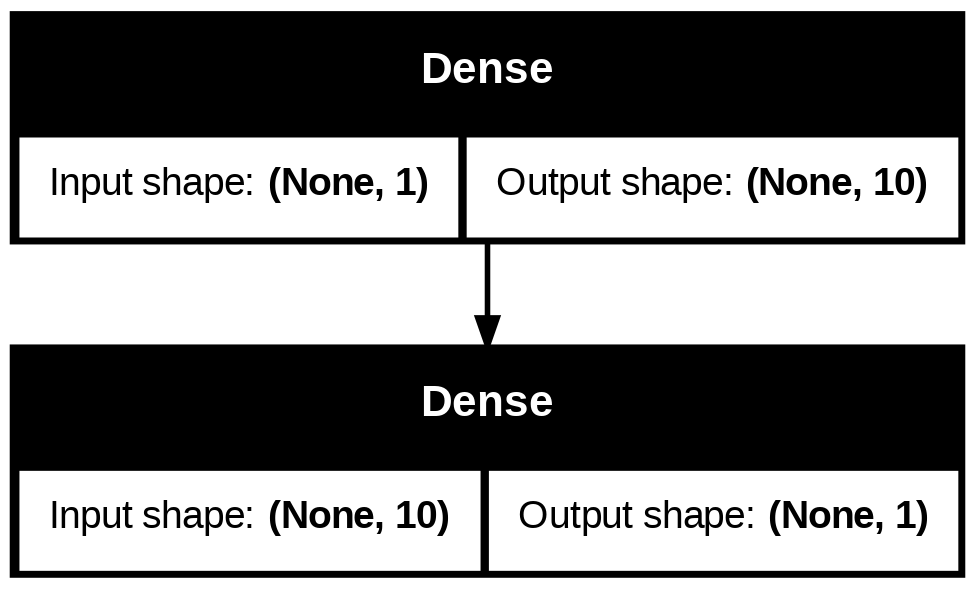

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [ ]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[37.083706],
       [39.450428],
       [41.817158],
       [44.18388 ],
       [46.550602],
       [48.91733 ],
       [51.284054],
       [53.650776],
       [56.0175  ],
       [58.384224]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

> 🔑 Note: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

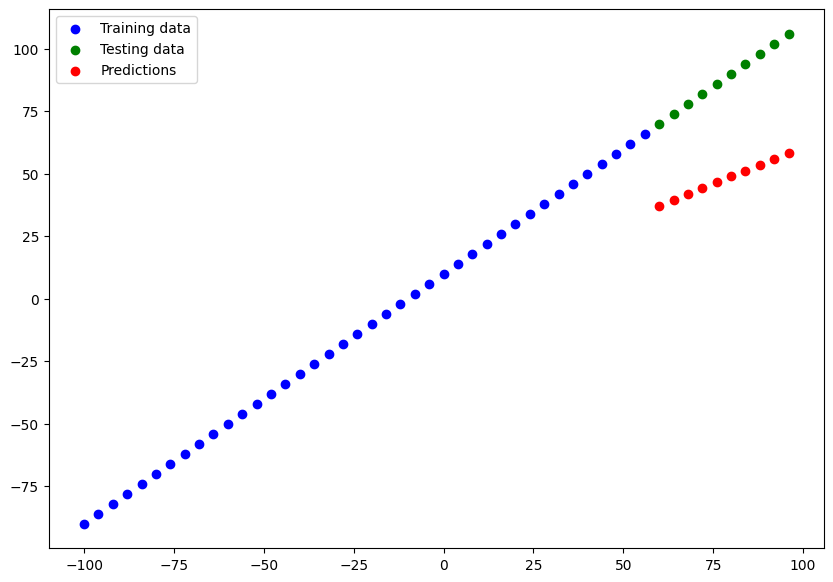

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

# Evaluting our model's predictions with regression evaluation metrics


Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.



Since we're working on a regression, two of the main metrics:


- MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
- MSE - mean square error, "square the average errors"

In [ ]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - loss: 40.2660 - mae: 40.2660


[40.26603317260742, 40.26603317260742]

In [ ]:
mae = tf.metrics.mae(y_true=y_test,y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([32.916294, 34.549572, 36.182842, 37.81612 , 39.449398, 41.08267 ,
       42.715946, 44.349224, 45.9825  , 47.615776], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[37.083706],
       [39.450428],
       [41.817158],
       [44.18388 ],
       [46.550602],
       [48.91733 ],
       [51.284054],
       [53.650776],
       [56.0175  ],
       [58.384224]], dtype=float32)>

In [ ]:
mae = tf.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([32.916294, 34.549572, 36.182842, 37.81612 , 39.449398, 41.08267 ,
       42.715946, 44.349224, 45.9825  , 47.615776], dtype=float32)>

In [ ]:
mse = tf.metrics.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1083.4824, 1193.673 , 1309.1981, 1430.059 , 1556.255 , 1687.7856,
       1824.6521, 1966.8536, 2114.3901, 2267.2622], dtype=float32)>

In [ ]:
# make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true=y_true, y_pred=tf.squeeze(y_pred))

# Running experiments to improve our model

Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

- model_1 - same as the original model, 1 layer, trained for 100 epochs

- model_2 - 2 layers, trained for 100 epochs

- model_3 - 2 layers, trained for 500 epochs

**Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 112.3185 - mae: 112.3185
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 77.1503 - mae: 77.1503
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 42.0847 - mae: 42.0847
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.0631 - mae: 11.0631
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.8673 - mae: 7.8673
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.8525 - mae: 10.8525
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6671 - mae: 7.6671
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.0259 - mae: 12.0259
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.1909 - mae: 8.1909
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.8443 - mae: 8.8443
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.7950 - mae: 7.7950
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.7599 - mae: 10.7599
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


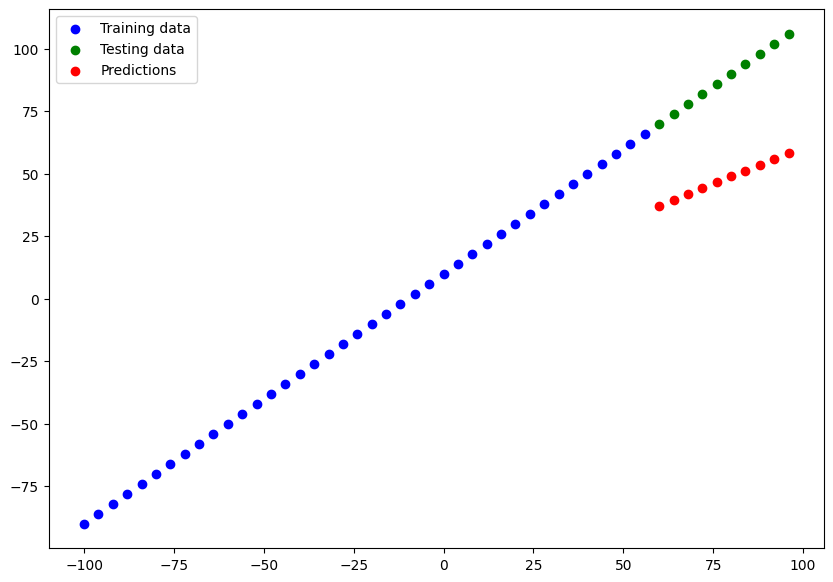

In [ ]:
y_preds_1 = model.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([32.916294, 34.549572, 36.182842, 37.81612 , 39.449398, 41.08267 ,
        42.715946, 44.349224, 45.9825  , 47.615776], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1083.4824, 1193.673 , 1309.1981, 1430.059 , 1556.255 , 1687.7856,
        1824.6521, 1966.8536, 2114.3901, 2267.2622], dtype=float32)>)

**Build model_2**

- 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 524ms/step - loss: 43.4156 - mse: 2605.8962
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 33.1733 - mse: 1521.2921
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 23.5630 - mse: 753.0720
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 19.5932 - mse: 521.2389
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.6126 - mse: 423.6162
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.7672 - mse: 383.9132
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.6082 - mse: 373.1921
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.7940 - mse: 218.5572
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.7173 - mse: 302.0461
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.6633 - mse: 331.3704
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.8318 - mse: 214.3372
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.8317 - mse: 303.2064
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


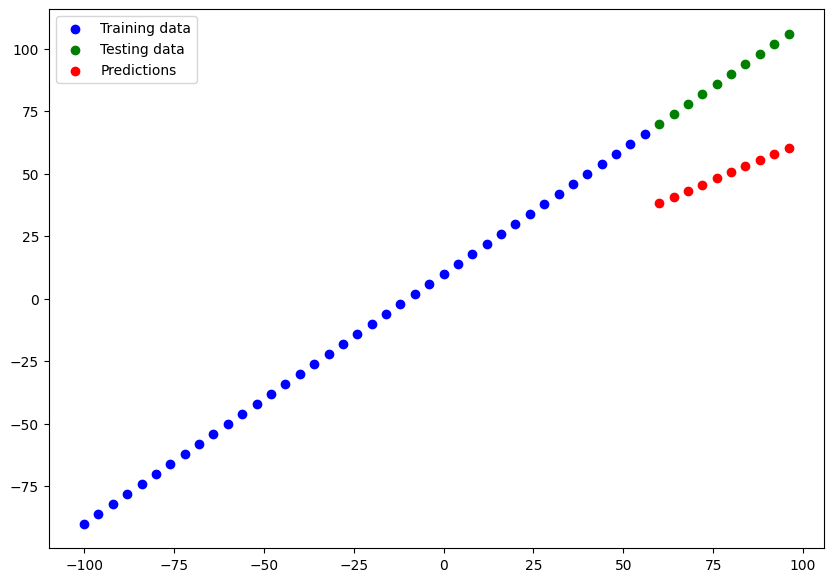

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([31.667294, 33.218258, 34.76923 , 36.320198, 37.87117 , 39.42214 ,
        40.973103, 42.524075, 44.07504 , 45.626007], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1002.8175, 1103.4526, 1208.8993, 1319.1567, 1434.2255, 1554.105 ,
        1678.7952, 1808.2969, 1942.609 , 2081.7324], dtype=float32)>)

**Build model_3**

- 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 740ms/step - loss: 29.0518 - mae: 29.0518
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 24.3263 - mae: 24.3263
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 23.3284 - mae: 23.3284 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 13.9447 - mae: 13.9447 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 19.0795 - mae: 19.0795
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.0560 - mae: 13.0560
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.9535 - mae: 14.9535
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.6034 - mae: 15.6034 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.5624 - mae: 11.5624
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.3880 - mae: 14.3880
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.9988 - mae: 10.9988
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.8246 - mae: 14.8246
Epoch 13/500
2/2 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


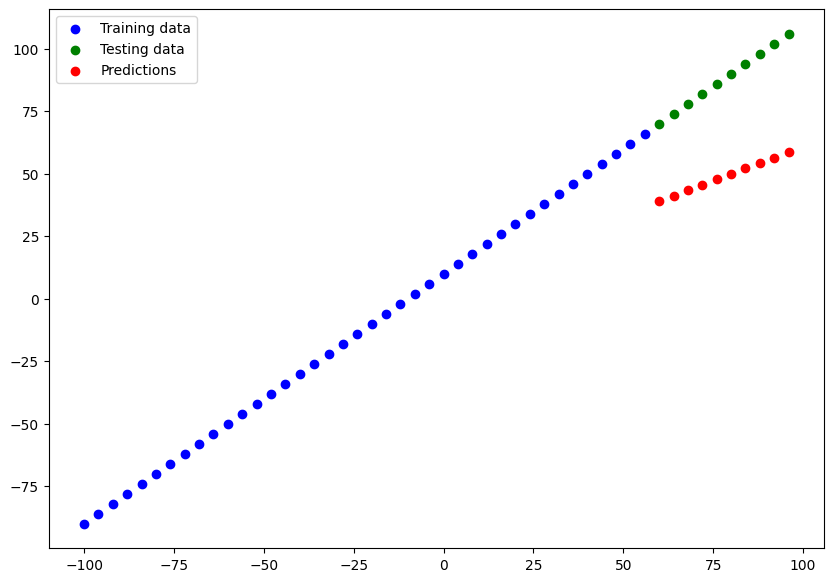

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evalaution metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([31.000206, 32.81315 , 34.626087, 36.43903 , 38.251972, 40.064907,
        41.87785 , 43.690792, 45.50373 , 47.316677], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 961.01276, 1076.7028 , 1198.966  , 1327.8029 , 1463.2134 ,
        1605.1968 , 1753.7543 , 1908.8853 , 2070.5896 , 2238.868  ],
       dtype=float32)>)

**ဘာမှထူးထူးခြားခြား မပြောင်းလဲသွား**

> 🔑 Note: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,"[32.916294, 34.549572, 36.182842, 37.81612, 39...","[1083.4824, 1193.673, 1309.1981, 1430.059, 155..."
1,model_2,"[31.667294, 33.218258, 34.76923, 36.320198, 37...","[1002.8175, 1103.4526, 1208.8993, 1319.1567, 1..."
2,model_3,"[31.000206, 32.81315, 34.626087, 36.43903, 38....","[961.01276, 1076.7028, 1198.966, 1327.8029, 14..."


In [ ]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

> 🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

# Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 Resource: As you build more models, you'll want to look into using:

- TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later). https://www.tensorflow.org/tensorboard

- Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

# Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

The SavedModel format
The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=best_model_SavedModel_format.

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

# Loading in a saved model

In [ ]:
# load in the savedmodel format model
loaded_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_model_preds = loaded_model.predict(X_test)

model_2_preds == loaded_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_model_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

# Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".

2. Use code (see the cell below).

3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

```python
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")
```

```python
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course
```

```
!ls /content/drive/MyDrive/tensorflow_course
```

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

cp: cannot create regular file '/content/drive/MyDrive/tensorflow_course': No such file or directory


In [ ]:
!ls /content/drive/MyDrive/tensorflow_course

ls: cannot access '/content/drive/MyDrive/tensorflow_course': No such file or directory


# A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 10175.7578 - mae: 10175.7578
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7628.3745 - mae: 7628.3745
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7510.2168 - mae: 7510.2168
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7409.8677 - mae: 7409.8677
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7834.8091 - mae: 7834.8091
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7221.1855 - mae: 7221.1855
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7512.1724 - mae: 7512.1724
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7588.2344 - mae: 7588.2344
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7576.3906 - mae: 7576.3906
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7727.9492 - mae: 7727.9492
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7672.0742 - mae: 7672.0742
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 9412.1465 - mae: 9412.1465


[9132.9853515625, 9132.9853515625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)

3. (insert your own experiment here)

In [ ]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2        True     False       True       False   
 1285   47  24.320         0        True     False       True       False   
 1142   52  24.860         0        True     False       True       False   
 969    39  34.320         5        True     False       True       False   
 486    54  21.470         3        True     False       True       False   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4        True     False       True       False   
 1130   39  23.870         5        True     False       True       False   
 1294   58  25.175         0       False      True       True       False   
 860    37  47.600         2        True     False      False        True   
 1126   55  29.900         0       False      True       True       False   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 13306.1006 - mae: 13306.1006
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13162.3604 - mae: 13162.3604
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12892.6191 - mae: 12892.6191
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12356.9697 - mae: 12356.9697
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11404.5518 - mae: 11404.5518
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10028.5215 - mae: 10028.5215
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8564.9873 - mae: 8564.9873
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7615.1875 - mae: 7615.1875
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7410.2651 - mae: 7410.2651
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7375.9590 - mae: 7375.9590
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7354.0156 - mae: 7354.0156
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 4844.2988 - mae: 4844.2988


[4708.8037109375, 4708.8037109375]

In [ ]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 3457.2803 - mae: 3457.2803


[3392.637939453125, 3392.637939453125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9412.1465 - mae: 9412.1465


[9132.9853515625, 9132.9853515625]

Text(0.5, 0, 'epochs')

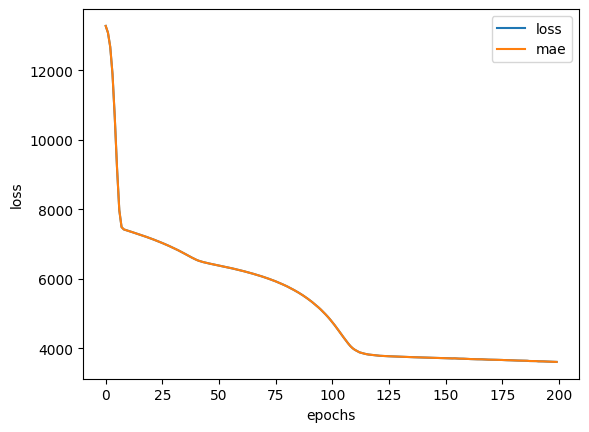

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 Question: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

# Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 3511.0969 - mae: 3511.0969


[3425.764892578125, 3425.764892578125]

Our model (insurance_model_4) fit on normalized data achieved a ~30% better score compared to the same model (insurnace_model_2) fit on non-normalized data!

In [ ]:
insurance_model_4.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

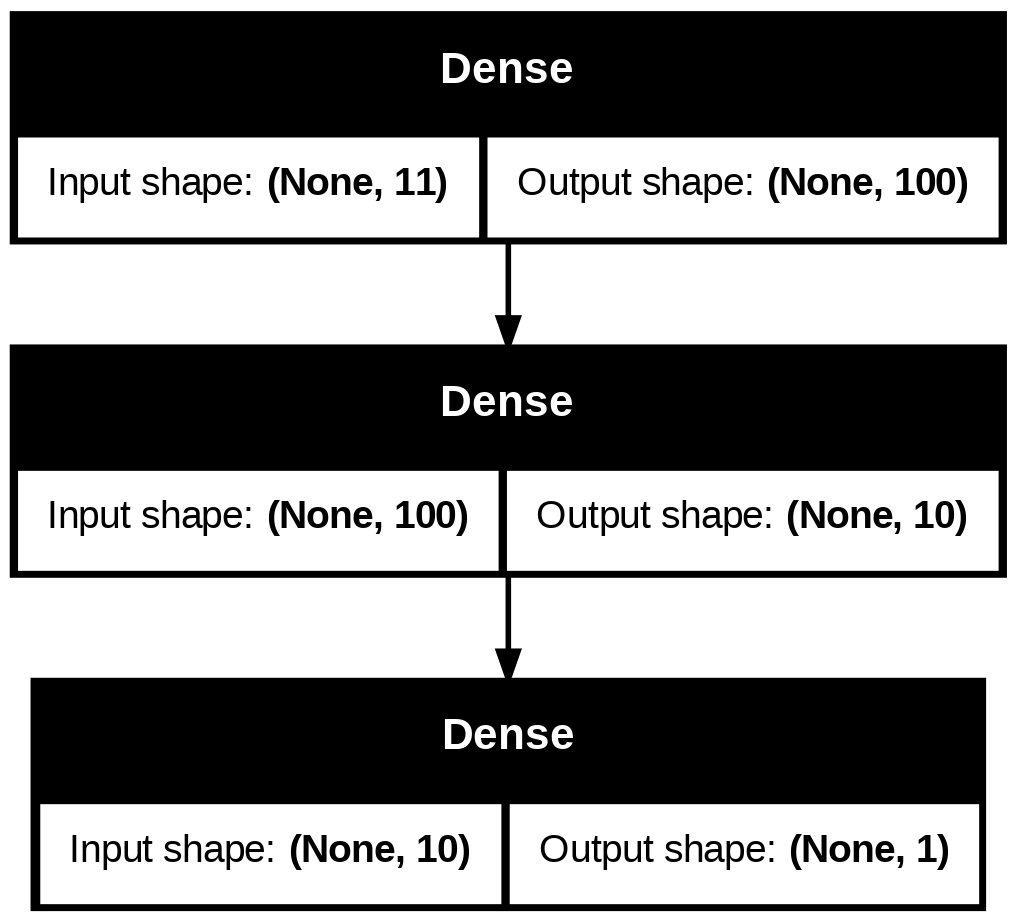

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=insurance_model_4, show_shapes=True)